#### Imports and Data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

years = [2018, 2019, 2020, 2021]
db = pd.read_csv('fifa_final.csv')

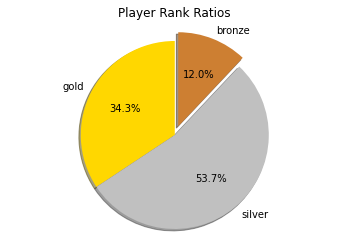

,Unnamed: 0,id,fifa_year,ws_player_id,age,height,weight,appearances,subs_on,min_played,goal_per_game,assists_total_per_game,yellow_cards_per_game,red_cards_per_game,shots_per_game,aerials_won_per_game,man_of_match_per_game,pass_success,tackles_per_game,interceptions_per_game,fouls_per_game,offsides_won_per_game,clearance_per_game,was_dribbled_per_game,outfielder_blocked_per_game,goal_own_per_game,key_pass_per_game,dribbles_won_per_game,fouls_given_per_game,offsides_given_per_game,dispossessed_per_game,turnovers_per_game,total_passes_per_game,accurate_crosses_per_game,accurate_long_passes_per_game,accurate_through_ball_per_game,fifa_pace,fifa_acceleration,fifa_sprint_speed,fifa_shooting,fifa_positioning,fifa_finishing,fifa_shot_power,fifa_long_shots,fifa_volleys,fifa_penalties,fifa_passing,fifa_vision,fifa_crossing,fifa_free_kick,fifa_short_passing,fifa_long_passing,fifa_curve,fifa_dribbling,fifa_agility,fifa_balance,fifa_reactions,fifa_ball_control,fifa_dribbling_min,fifa_composure,fifa_defense,fifa_marking,fifa_interceptions,fifa_heading_accuracy,fifa_standing_tackle,fifa_sliding_tackle,fifa_physical,fifa_jumping,fifa_stamina,fifa_strength,fifa_aggression,fifa_overall_score
count,20873.00000,20873.00000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.000000,20873.00000
mean,10436.00000,10437.00000,2019.538878,166920.235232,28.067408,181.756288,76.168831,19.540124,3.820486,1410.023811,0.079524,0.056835,0.135674,0.008329,0.778658,1.117964,0.029396,75.794459,1.159871,0.855426,0.897092,0.139958,1.422792,0.596561,0.200845,0.000335,0.582934,0.578998,0.813814,0.123658,0.677036,0.966955,28.476296,0.274646,2.064520,0.025660,69.337038,66.807598,66.969674,58.619604,56.268050,51.040962,63.599530,53.819049,48.986011,52.952379,63.269726,59.369520,56.058305,48.278829,65.319360,59.121257,54.294304,68.237340,66.502324,65.206008,68.490778,65.320989,62.287644,65.346764,55.167489,51.975375,52.592248,57.747856,53.095722,50.479136,68.583577,67.377090,67.288698,68.279069,62.393092,71.80252
std,6025.66042,6025.66042,1.116720,121462.600339,4.446469,6.649601,7.049206,11.750946,4.381190,1018.747653,0.129391,0.083838,0.132099,0.035336,0.741475,1.073120,0.054478,12.017648,0.856128,0.772049,0.588255,0.258420,1.565453,0.476447,0.270457,0.018310,0.550590,0.607561,0.625483,0.221482,0.618885,0.778773,14.988935,0.418524,2.132988,0.061007,11.639055,14.157080,13.925952,14.183433,19.621142,19.817994,15.079884,19.411181,18.558150,15.776109,9.904240,14.140775,18.435674,18.318327,13.679245,14.581402,18.973710,9.572353,13.957044,13.997762,8.016251,15.863369,18.210616,10.844227,17.404182,21.193895,21.503851,17.333131,22.529012,22.516751,8.806664,11.813731,14.523082,11.801917,16.665678,6.28183
min,0.00000,1.00000,2018.000000,70.000000,17.000000,156.000000,54.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,13.000000,15.000000,15.000000,2.000000,3.000000,2.000000,4.000000,4.000000,8.000000,27.000000,10.000000,6.000000,4

In [61]:
sizes = [len(db[db['fifa_overall_category'] == 'gold']), 
         len(db[db['fifa_overall_category'] == 'silver']), 
         len(db[db['fifa_overall_category'] == 'bronze']) ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,
          labels=['gold', 'silver', 'bronze'], 
          colors=['gold', 'silver','#cd7f32'],
          explode=(0,0,0.1),
          shadow=True, startangle=90, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Player Rank Ratios')


plt.show()

db.describe()

4
[2708, 2775, 2869, 2848]


Text(0.5, 0.35, 'Player Rank \n \n By Year')

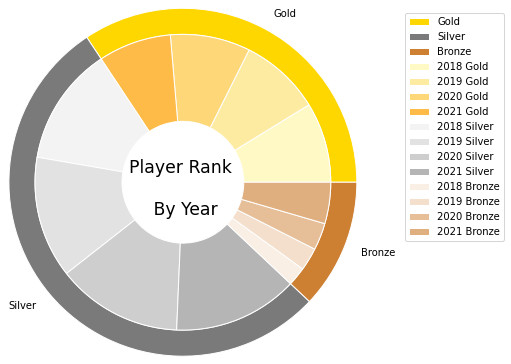

In [62]:
gold = db[db['fifa_overall_category'] == 'gold']
silver = db[db['fifa_overall_category'] == 'silver']
bronze = db[db['fifa_overall_category'] == 'bronze']

# Get the year breakdown of each year
years = [2018, 2019, 2020, 2021]
gold_year, silver_year, bronze_year = [], [], []

for year in years:
  gold_year.append(len(gold[gold['fifa_year'] == year].to_numpy()))
  silver_year.append(len(silver[silver['fifa_year'] == year].to_numpy()))
  bronze_year.append(len(bronze[bronze['fifa_year'] == year].to_numpy()))

plots = [
         len(gold),
         len(silver),
         len(bronze)
]
print(len(bronze_year))
subgroup=[
               gold_year[0],
               gold_year[1],
               gold_year[2],
               gold_year[3],
               silver_year[0],
               silver_year[1],
               silver_year[2],
               silver_year[3],
               bronze_year[0],
               bronze_year[1],
               bronze_year[2],
               bronze_year[3],
               ]

labels = [
          'Gold', 'Silver', "Bronze",
          '2018 Gold','2019 Gold','2020 Gold','2021 Gold',
          '2018 Silver','2019 Silver','2020 Silver','2021 Silver',
          '2018 Bronze','2019 Bronze','2020 Bronze','2021 Bronze',
]

print(silver_year)
a, b, c=[plt.cm.YlOrBr, plt.cm.Greys, plt.cm.BuPu]
colors = [a(0.1), a(0.2), a(0.3),a(0.4), b(0.1), b(0.2), b(0.3), b(0.4), '#F9EFE5', '#F3DFCC', '#E6BF99', '#E0AF7F']
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(plots, radius=2, labels=['Gold','Silver','Bronze'], colors=['#FFD700', b(0.6), '#CD7F32'])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup, radius=2-0.3, labeldistance=0.75, colors=colors)
plt.setp( mypie2, width=1, edgecolor='white')
plt.margins(0,0)
plt.legend(bbox_to_anchor=(1.15, 1.3), loc='upper left', borderaxespad=0.5,  labels=labels)
fig.text(.5,0.35,'Player Rank \n \n By Year',
        horizontalalignment='center',
         fontSize='xx-large',
        transform=ax.transAxes)

# show it


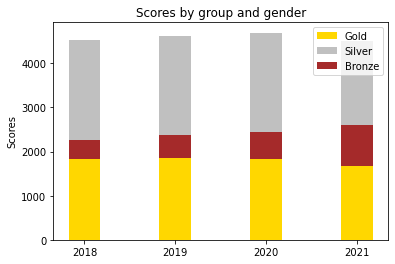

In [63]:
N = 4
gold_yr = (gold_year[0], gold_year[1], gold_year[2], gold_year[3])
silver_yr = (silver_year[0], silver_year[1], silver_year[2], silver_year[3])
bronze_yr = (bronze_year[0], bronze_year[1], bronze_year[2], bronze_year[3])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, gold_yr, width, color='gold')
p2 = plt.bar(ind, silver_yr, width, bottom=gold_yr, color='silver')
p3 = plt.bar(ind, bronze_yr, width, bottom=gold_yr, color='brown')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('2018', '2019', '2020', '2021'))
plt.legend((p1[0], p2[0],p3[0]), ('Gold', 'Silver','Bronze'))

plt.show()

## Latest

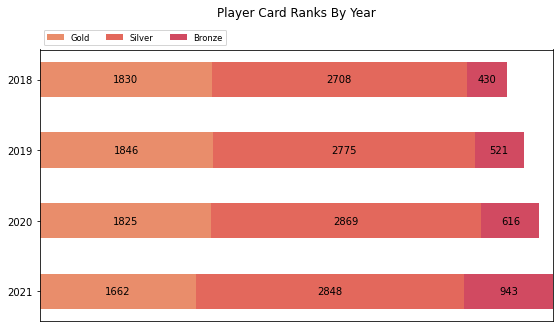

In [69]:
category_names = ['Gold', 'Silver', "Bronze"]
results = {
    '2018': [gold_year[0], silver_year[0], bronze_year[0]],
    '2019': [gold_year[1], silver_year[1], bronze_year[1]],
    '2020': [gold_year[2], silver_year[2], bronze_year[2]],
    '2021':[gold_year[3], silver_year[3], bronze_year[3]]
}

pallete = sns.palettes.color_palette('flare')

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = pallete
    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.set_title('Player Card Ranks By Year', y=1.1)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        text_color = 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

Here is the proportion of ranked players 


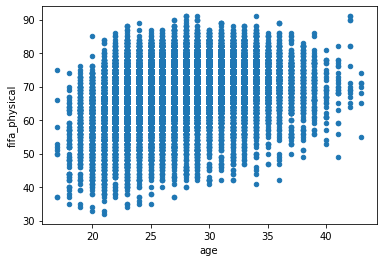

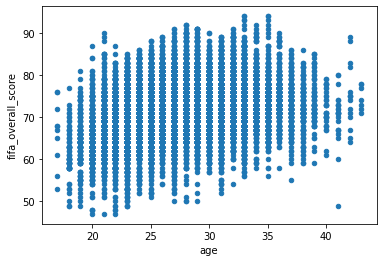

In [4]:
db.plot.scatter(x='age',y='fifa_physical')
db.plot.scatter(x='age',y='fifa_overall_score')

In [5]:
from sklearn.decomposition import PCA

tr = db.loc[:, 'age':'accurate_through_ball_per_game']
tr = tr.drop(['position'], axis=1)
X = np.array(tr)

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)
plt.scatter(projected[:, 0], projected[:, 1],
            c=db['fifa_overall_score'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

ValueError: ignored

In [ ]:
pca = PCA().fit(X)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(right=20)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
skew = db.loc[db['min_played'] > 90]
sizes = [len(skew.query('fifa_overall_category == "gold"')), 
         len(skew.query('fifa_overall_category == "silver"')), 
         len(skew.query('fifa_overall_category == "bronze"')) ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,
          labels=['Gold', 'Silver', 'Bronze'], 
          colors=['gold', 'silver','#cd7f32'],
          explode=(0,0,0.2),
          shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Player Data Rank Ratios \n')
plt.show()


In [ ]:
import seaborn as sn

corrMatrix = attackDB.corr()
corrMatrix.to_csv("corrMatrix_shooting.csv")
plot1 = plt.figure()
sn.heatmap(corrMatrix, annot=False)
plt.savefig("corrMat_shooting.png")